<a href="https://www.kaggle.com/code/sjagkoo7/bmi-body-mass-index-prediction?scriptVersionId=150212830" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction
In this case study , we will be working with a dataset that contains information about individual's height,weight,gender,and body mass index(BMI). The BMI is a Measure that uses your height and weight to work out if your weight is healthy. The BMI calculation divides an adult's weight in kilograms by their height in meters squared.
The dataset contains the followings columns:

* `Gender : The gender of the individual`
* `Height : The height of the individual in cm`
* `Weight : The weight of individual in kg`
* `Index : The BMI index of the individual , categorized as follows:`

   `0:Extremly Weak
    1:Weak
    2:Normal
    3:Overweight
    4:Obesity
    5:Extremly Obesity`

# Importing Libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for visualization like pie graph
import seaborn as sns # for visualization like scatter plot 
from ydata_profiling import profile_report

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/opt/conda/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
/opt/conda/lib/python3.10/site-packages/visions/backends/shared/nan_handling.py:51: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def hasna(x: np.ndarray) -> bool:


/kaggle/input/bmi-body-mass-index/bmi_train.csv
/kaggle/input/bmi-body-mass-index/bmi_validation.csv


# Reading the Dataset

In [2]:
#reading the train & validation data set
train=pd.read_csv('/kaggle/input/bmi-body-mass-index/bmi_train.csv')
validation=pd.read_csv('/kaggle/input/bmi-body-mass-index/bmi_validation.csv')

In [3]:
#displaying first 2 rows train dataset
train.head(2)

,Gender,Height,Weight,Index
0,Male,161,89,4
1,Male,179,127,4


In [4]:
#displaying first 2 rows validation dataset
validation.head(2)

,Gender,Height,Weight
0,Male,161,103
1,Male,180,75


# Exploring the Dataset

In [5]:
# train dataset
# train.shape # total rows & columns
# len(train) # total rows in dataset
# train.size  # total elements in dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  400 non-null    object
 1   Height  400 non-null    int64 
 2   Weight  400 non-null    int64 
 3   Index   400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [6]:
# validation dataset
# validation.shape # total rows & columns
# len(validation) # total rows in dataset
# validation.size  # total elements in dataset
validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  100 non-null    object
 1   Height  100 non-null    int64 
 2   Weight  100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


### `**in this train/validation dataset there is one categorical feature. Hence it will require feature encoding**`

In [7]:
#unique values on train dataset
#train.nunique()
#unique values on train dataset
# validation.nunique()

In [8]:
#train dataset - displaying rows if any have duplicate rows
train_rows_data=train[train.duplicated()]
train_rows_data

,Gender,Height,Weight,Index
92,Female,195,104,3
120,Male,177,117,4
267,Female,167,85,4
277,Male,171,147,5
282,Male,174,90,3
322,Female,142,86,5
344,Female,164,71,3
359,Female,182,84,3


### `**There are duplicates in train dataset.Hence it will require to remove the duplicates**`

In [9]:
#validation dataset - displaying rows if any have duplicate rows
validation_rows_data=validation[validation.duplicated()]
validation_rows_data

,Gender,Height,Weight


### `**There are no duplicates in validation dataset**`

In [10]:
#null values in train dataset
#train.isna().sum()
#null values in validation dataset
#train.isna().sum()

In [11]:
#train dataset - displaying rows if any have null rows
train[train.isna().any(axis=1)]

,Gender,Height,Weight,Index


In [12]:
#validation dataset - displaying rows if any have null rows
validation[validation.isna().any(axis=1)]

,Gender,Height,Weight


### `**There is no any null values in train and validation dataset**`

In [13]:
# statatics summary train dataset
#train.describe()
# statatics summary validation dataset
#validation.describe()

In [14]:
# train dataset
train_summary=pd.DataFrame(index=train.columns)
train_summary['count']=train.count()
train_summary['nunique']=train.nunique()
train_summary['null']=train.isna().sum()
train_summary['dtypes']=train.dtypes
train_summary=pd.concat([train_summary,train.describe().T.drop('count',axis=1)],axis=1)
train_summary

,count,nunique,null,dtypes,mean,std,min,25%,50%,75%,max
Gender,400,2,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Height,400,60,0,int64,170.3625,16.574011,140.0,156.0,171.0,184.00,199.0
Weight,400,110,0,int64,106.0600,32.362242,50.0,80.0,106.5,136.25,160.0
Index,400,6,0,int64,3.7375,1.370507,0.0,3.0,4.0,5.00,5.0


In [15]:
# validation dataset
validation_summary=pd.DataFrame(index=validation.columns)
validation_summary['count']=validation.count()
validation_summary['nunique']=validation.nunique()
validation_summary['null']=validation.isna().sum()
validation_summary['dtypes']=validation.dtypes
validation_summary=pd.concat([validation_summary,validation.describe().T.drop('count',axis=1)],axis=1)
validation_summary

,count,nunique,null,dtypes,mean,std,min,25%,50%,75%,max
Gender,100,2,0,object,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Height,100,52,0,int64,168.27,15.521803,141.0,156.0,168.0,180.25,197.0
Weight,100,63,0,int64,105.76,32.626172,51.0,76.5,103.5,135.25,160.0


In [16]:
# detail report - dasborad train dataset
train.profile_report(title ='detail report - dasborad train dataset',progress_bar=False)

In [17]:
# detail report - dasborad validation dataset
validation.profile_report(title ='detail report - dasborad validation dataset',progress_bar=False)

In [18]:
train_t=train.copy()
validation_v=validation.copy()

# Data Cleaning

In [19]:
#removing duplicate from train datset
train_t.drop_duplicates(inplace=True)

In [20]:
train_t[train_t.duplicated()]

,Gender,Height,Weight,Index


# Feature Encoding

In [21]:
# Feature encoding on Train dataset
train_t['Gender']=train_t['Gender'].map({'Male':0 ,'Female':1})
# Feature encoding on  validation dataset
validation_v['Gender']=validation_v['Gender'].map({'Male':0 ,'Female':1})

In [22]:
train_t.head(2)

,Gender,Height,Weight,Index
0,0,161,89,4
1,0,179,127,4


In [23]:
validation_v.head(2)

,Gender,Height,Weight
0,0,161,103
1,0,180,75


# Co-Realtion Matrix

In [24]:
#Co-relation train data set
corr=train_t.corr()
corr

,Gender,Height,Weight,Index
Gender,1.000000,0.029467,-0.024793,-0.062083
Height,0.029467,1.000000,0.030752,-0.405859
Weight,-0.024793,0.030752,1.000000,0.804458
Index,-0.062083,-0.405859,0.804458,1.000000


Text(0.5, 1.0, 'Co-relation of training dataset\n')

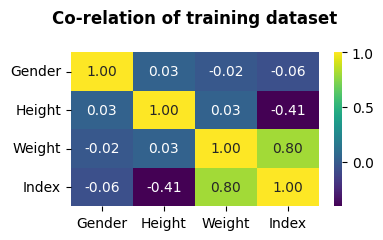

In [25]:
plt.figure(figsize=(4,2))
sns.heatmap(corr,cmap='viridis',annot=True,fmt='0.2f')
plt.title('Co-relation of training dataset\n',fontsize='12',fontweight='bold')

In [26]:
#Co-relation validation data set
corr=validation_v.corr()
corr

,Gender,Height,Weight
Gender,1.000000,-0.011518,0.093003
Height,-0.011518,1.000000,-0.140051
Weight,0.093003,-0.140051,1.000000


Text(0.5, 1.0, 'Co-relation of validation dataset\n')

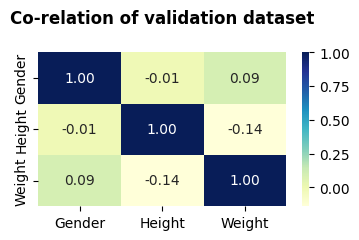

In [27]:
plt.figure(figsize=(4,2))
sns.heatmap(corr,cmap='YlGnBu',annot=True,fmt='0.2f')
plt.title('Co-relation of validation dataset\n',fontsize='12',fontweight='bold')

### `**weight is highly co-realted with index**`

# Gender Effect on Index

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

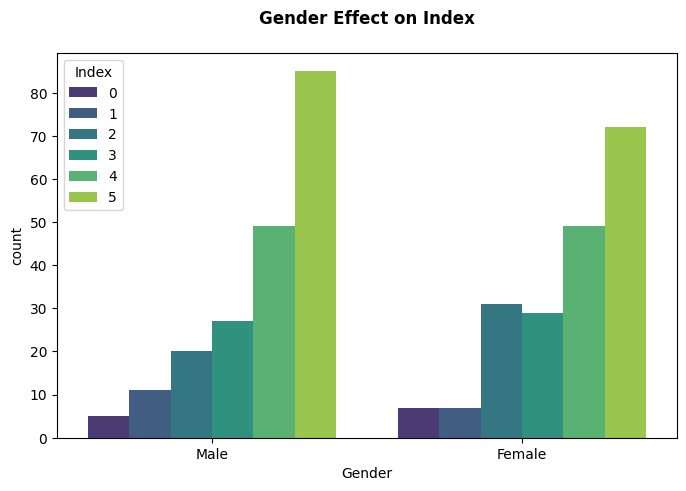

In [28]:
plt.figure(figsize=(8,5))
g=sns.countplot(data=train_t,x='Gender',hue='Index',palette='viridis') # palette='viridis'-- for coloring
plt.title('Gender Effect on Index\n',fontsize=12,fontweight='bold')
g.set_xticklabels(['Male','Female'])

### `** Male is having more Obesity/Index as compare to Female**`

# Height Effect on Gender

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

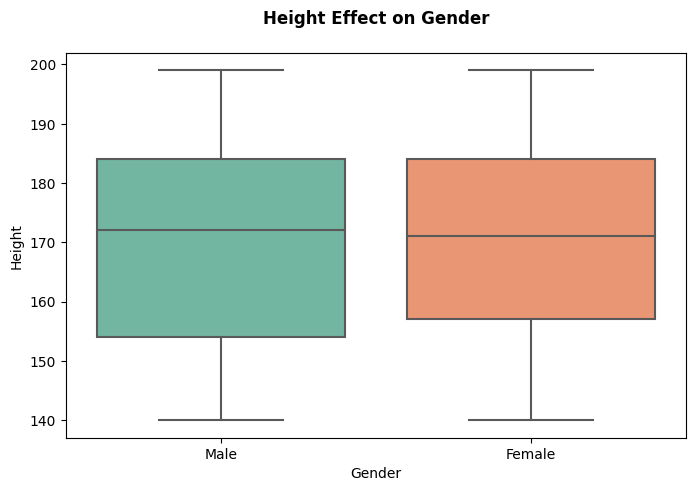

In [29]:
plt.figure(figsize=(8,5))
g=sns.boxplot(data=train_t,x='Gender',y='Height',palette='Set2') # palette='Set2'-- for coloring
plt.title('Height Effect on Gender\n',fontdict={'fontsize':12,'fontweight':'bold'})
g.set_xticklabels(['Male','Female'])

### `**graph shows the  height of male is less than feamle usually**`

# Weight Effect on Gender

[Text(0, 0, 'Male'), Text(1, 0, 'Female')]

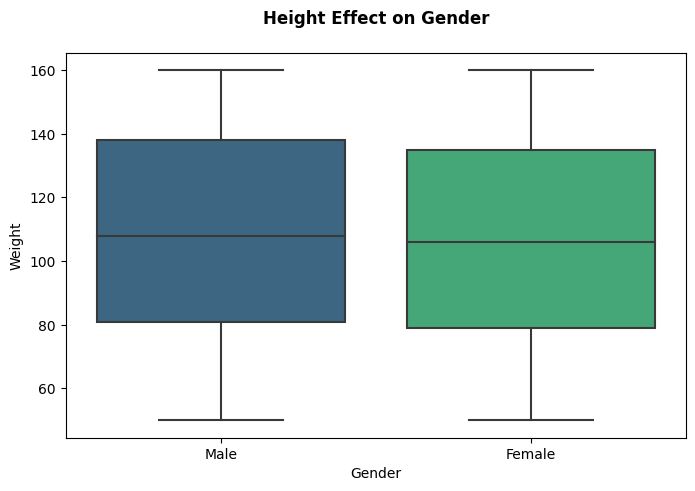

In [30]:
plt.figure(figsize=(8,5))
g=sns.boxplot(data=train_t,x='Gender',y='Weight',palette='viridis') # palette='viridis'-- for coloring
plt.title('Height Effect on Gender\n',fontdict={'fontsize':12,'fontweight':'bold'})
g.set_xticklabels(['Male','Female'])

### `**graph shows the weight of female is less than male usually**`

# Height & Weight Effect on Index

Text(0.5, 1.0, 'Height & Weight Effect on Index\n')

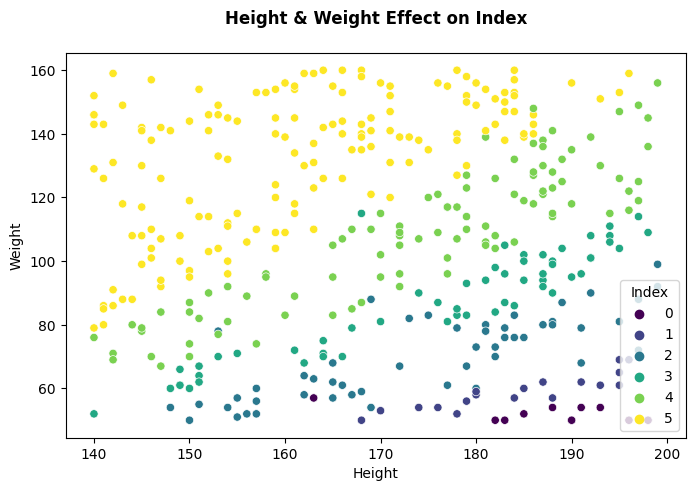

In [31]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=train_t,x='Height',y='Weight',hue='Index',palette='viridis') # palette='viridis'-- for coloring
plt.title('Height & Weight Effect on Index\n',fontdict={'fontsize':12,'fontweight':'bold'})

### `**graph indicates there are more Obesity/Index than normal health condtion**`

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/tmp/ipykernel_21/355011941.py:4: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 1000x800 with 0 Axes>

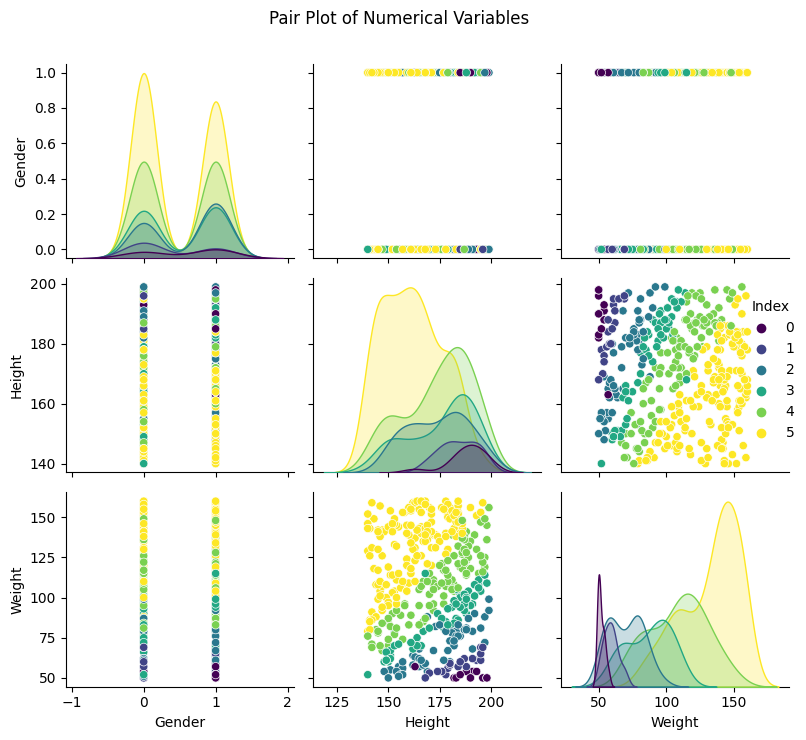

In [32]:
plt.figure(figsize=(10,8))
sns.pairplot(data=train_t,hue='Index',palette='viridis',kind='scatter') # palette='viridis'-- for coloring
plt.suptitle('Pair Plot of Numerical Variables\n')
plt.tight_layout()

# Feature Scaling

In [33]:
#split the train_t dataset into feature input variable and target output variable
X=train_t.drop('Index',axis=1)
y=train_t['Index']

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#train_t dataset feature scaling
X_scaled=pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
#validation_v dataset feature scaling
validation_v_scaled=pd.DataFrame(scaler.transform(validation_v),columns=validation_v.columns)

In [35]:
X_scaled.head(2)

,Gender,Height,Weight
0,-0.994911,-0.562794,-0.530498
1,-0.994911,0.521903,0.639866


In [36]:
validation_v_scaled.head(2)

,Gender,Height,Weight
0,-0.994911,-0.562794,-0.099311
1,-0.994911,0.582164,-0.961685


In [37]:
#split the X_scaled and y into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3, train_size=0.7, random_state=42)

# Logistic Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [39]:
#cross validation
lr=LogisticRegression(random_state=42)
kf=KFold(n_splits=5)
score=cross_val_score(lr,X_scaled,y,cv=kf)
print(f'Cross validation score : {score}')
print(f'Average validation score : {score.mean()}')

Cross validation score : [0.86075949 0.73417722 0.78205128 0.76923077 0.85897436]
Average validation score : 0.8010386238234339


In [40]:
# training & prediction
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)
y_pred

array([5, 1, 5, 5, 5, 4, 5, 5, 3, 5, 5, 2, 4, 5, 5, 4, 2, 4, 4, 2, 5, 5,
       4, 4, 5, 2, 4, 5, 5, 2, 2, 4, 1, 2, 2, 5, 3, 5, 5, 4, 5, 5, 5, 3,
       4, 4, 5, 3, 2, 5, 5, 3, 2, 5, 5, 2, 5, 4, 4, 3, 3, 4, 2, 4, 2, 5,
       5, 3, 5, 4, 5, 3, 3, 5, 3, 4, 1, 5, 5, 1, 2, 3, 5, 5, 3, 4, 2, 3,
       4, 5, 5, 4, 5, 2, 2, 1, 4, 5, 2, 5, 3, 5, 5, 2, 4, 4, 5, 4, 4, 5,
       4, 3, 4, 4, 5, 3, 5, 5])

In [41]:
# accuracy score
acc_lr=accuracy_score(y_test,y_pred)
acc_lr

0.788135593220339

In [42]:
#classification reprot
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.40      0.25      0.31         8
           2       0.47      0.50      0.49        18
           3       0.47      0.73      0.57        11
           4       0.97      0.93      0.95        30
           5       0.96      1.00      0.98        46

    accuracy                           0.79       118
   macro avg       0.54      0.57      0.55       118
weighted avg       0.76      0.79      0.77       118



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 0  3  2  0  0  0]
 [ 0  2  6  0  0  0]
 [ 0  0  9  9  0  0]
 [ 0  0  2  8  1  0]
 [ 0  0  0  0 28  2]
 [ 0  0  0  0  0 46]]


In [44]:
#prediting the index for validation dataset
y_pred_lr=lr.predict(validation_v_scaled)
y_pred_lr

array([4, 3, 4, 4, 4, 5, 5, 5, 4, 5, 4, 5, 2, 5, 5, 2, 5, 5, 3, 5, 2, 5,
       1, 4, 4, 5, 5, 5, 5, 2, 4, 5, 4, 4, 4, 2, 5, 2, 4, 3, 5, 2, 4, 4,
       5, 4, 4, 4, 4, 4, 5, 4, 2, 2, 5, 3, 3, 5, 5, 4, 5, 5, 5, 5, 2, 3,
       4, 4, 2, 2, 2, 5, 3, 4, 5, 5, 5, 4, 3, 5, 5, 3, 2, 5, 4, 5, 3, 5,
       5, 3, 1, 2, 5, 4, 5, 2, 5, 5, 2, 5])

# Random Forest Classifier

In [45]:
from sklearn.ensemble import RandomForestClassifier
#cross validation
rfc=RandomForestClassifier(random_state=42)
score=cross_val_score(rfc,X_scaled,y,cv=kf)
print(f'Cross validation score : {score}')
print(f'Cross validation score : {score.mean()}')

Cross validation score : [0.81012658 0.83544304 0.85897436 0.84615385 0.85897436]
Cross validation score : 0.8419344368711457


In [46]:
#training & prediction
rfc.fit(X_train,y_train)
y_pred=rfc.predict(X_test)
y_pred

array([5, 1, 5, 5, 5, 4, 5, 5, 4, 5, 5, 2, 4, 5, 5, 4, 0, 4, 4, 2, 5, 5,
       5, 5, 5, 2, 4, 5, 5, 2, 3, 4, 1, 3, 2, 5, 4, 5, 5, 4, 5, 5, 5, 2,
       4, 4, 5, 2, 1, 5, 5, 3, 1, 5, 5, 1, 5, 4, 4, 3, 3, 4, 3, 5, 1, 5,
       5, 3, 5, 3, 5, 3, 3, 5, 3, 4, 0, 5, 5, 1, 3, 3, 5, 5, 3, 3, 3, 3,
       4, 5, 5, 4, 5, 1, 3, 1, 4, 5, 1, 5, 3, 5, 4, 2, 4, 4, 5, 4, 4, 5,
       4, 2, 3, 3, 5, 3, 5, 5])

In [47]:
#accuracy score
acc_rfc=accuracy_score(y_test,y_pred)
acc_rfc

0.7711864406779662

In [48]:
#classification reprot
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.70      0.88      0.78         8
           2       0.89      0.44      0.59        18
           3       0.36      0.73      0.48        11
           4       0.84      0.70      0.76        30
           5       0.90      0.98      0.94        46

    accuracy                           0.77       118
   macro avg       0.78      0.69      0.69       118
weighted avg       0.82      0.77      0.77       118



In [49]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 2  2  0  1  0  0]
 [ 0  7  1  0  0  0]
 [ 0  1  8  9  0  0]
 [ 0  0  0  8  3  0]
 [ 0  0  0  4 21  5]
 [ 0  0  0  0  1 45]]


In [50]:
#feature importance
feature_importance=pd.Series(rfc.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_importance

Weight    0.632904
Height    0.350909
Gender    0.016187
dtype: float64

In [51]:
#prediting the index for validation dataset
y_pred_rfc=rfc.predict(validation_v_scaled)
y_pred_rfc

array([5, 2, 3, 4, 5, 5, 5, 5, 4, 5, 4, 5, 1, 5, 5, 2, 5, 5, 3, 5, 2, 5,
       1, 4, 4, 5, 5, 5, 5, 2, 4, 5, 4, 4, 3, 2, 5, 2, 3, 2, 5, 1, 4, 3,
       5, 4, 3, 4, 4, 4, 5, 5, 2, 1, 5, 3, 3, 5, 5, 4, 5, 5, 4, 5, 0, 3,
       4, 4, 2, 2, 2, 5, 2, 4, 5, 5, 5, 4, 3, 5, 5, 3, 2, 5, 4, 5, 3, 5,
       4, 3, 1, 2, 5, 3, 5, 2, 5, 5, 1, 5])

# Hyperparameters Tuning - Grid Search
`parameters :`

      `n_estimators`: 100,200,300
      `max_depth`: 10,20,30   
      `min_samples_split`: 2, 5, 10

In [52]:
from sklearn.model_selection import GridSearchCV
param_grid={'n_estimators':[100,200,300], # Number of trees
            'max_depth':[10,20,30],  # Maximum depth of the tree
            'min_samples_split':[2,5,10] } # Minimum samples required to split a node

In [53]:
grid_search=GridSearchCV(estimator=rfc, # RandomForestClassifier
                         param_grid=param_grid, # Hyperparameter grid
                         cv=3, # 3-fold cross-validation
                         n_jobs=-1 # Use all available cores
                        )

In [54]:
# training the model
grid_search.fit(X_train,y_train)
# best parameters
print("Best Hyperparameters:",grid_search.best_params_)

Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 300}


In [55]:
#predicting the result
y_pred=grid_search.best_estimator_.predict(X_test)
y_pred

array([5, 1, 5, 5, 5, 4, 5, 5, 4, 5, 5, 2, 4, 5, 5, 4, 0, 4, 4, 2, 5, 5,
       5, 5, 5, 2, 4, 5, 5, 2, 3, 4, 1, 3, 2, 5, 4, 5, 5, 4, 5, 5, 5, 2,
       4, 4, 5, 3, 1, 5, 5, 3, 1, 5, 5, 1, 5, 4, 4, 3, 3, 4, 3, 5, 1, 5,
       5, 2, 4, 3, 5, 3, 3, 5, 3, 4, 0, 5, 5, 1, 3, 3, 5, 5, 3, 3, 0, 3,
       4, 5, 5, 4, 5, 1, 3, 1, 4, 5, 1, 5, 3, 5, 4, 2, 4, 4, 5, 4, 4, 5,
       4, 2, 3, 3, 5, 3, 5, 5])

In [56]:
#accuracy score
acc_rfc_hype=accuracy_score(y_test,y_pred)
acc_rfc_hype

0.7711864406779662

In [57]:
#classification reprot
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       0.70      0.88      0.78         8
           2       0.89      0.44      0.59        18
           3       0.38      0.73      0.50        11
           4       0.81      0.70      0.75        30
           5       0.90      0.96      0.93        46

    accuracy                           0.77       118
   macro avg       0.78      0.72      0.72       118
weighted avg       0.82      0.77      0.77       118



In [58]:
#confusion matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[ 3  2  0  0  0  0]
 [ 0  7  1  0  0  0]
 [ 0  1  8  9  0  0]
 [ 0  0  0  8  3  0]
 [ 0  0  0  4 21  5]
 [ 0  0  0  0  2 44]]


In [59]:
#prediting the index for validation dataset
y_pred_rfc_hype=grid_search.best_estimator_.predict(validation_v_scaled)
y_pred_rfc_hype

array([5, 2, 3, 4, 5, 5, 5, 5, 4, 5, 4, 5, 1, 5, 5, 2, 5, 5, 3, 5, 2, 5,
       1, 4, 4, 5, 5, 5, 5, 2, 4, 5, 4, 4, 3, 2, 5, 2, 3, 2, 5, 1, 4, 3,
       5, 4, 3, 4, 4, 4, 5, 5, 3, 1, 5, 3, 3, 5, 5, 4, 5, 5, 4, 5, 0, 3,
       4, 4, 2, 2, 2, 5, 2, 4, 5, 5, 5, 4, 3, 5, 5, 3, 2, 5, 4, 5, 3, 5,
       4, 3, 1, 2, 5, 3, 5, 2, 5, 5, 1, 5])

# Score Comparision Logistic Regression , Random Forest Classifier & Random Forest Classifier-Grid Search

In [60]:
comp_acc=pd.DataFrame({'Model':['Logistic','Random Forest','Grid Search'],'Accuracy':[acc_lr,acc_rfc,acc_rfc_hype]})
comp_acc

,Model,Accuracy
0,Logistic,0.788136
1,Random Forest,0.771186
2,Grid Search,0.771186


# Prediction Comparision Logistic Regression , Random Forest Classifier & Random Forest Classifier-Grid Search

In [61]:
index=pd.DataFrame({'Logistic':y_pred_lr,'Random Forest':y_pred_rfc,'Grid Search':y_pred_rfc_hype})
index.head(2)

,Logistic,Random Forest,Grid Search
0,4,5,5
1,3,2,2


In [62]:
index.to_csv('index.csv')